In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
from keras.layers import BatchNormalization
from keras import models, layers

from google.colab import drive
import pickle
from keras import backend as K
from tensorflow.keras.applications import ResNet50
from keras import Input

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


features = np.load('/content/drive/MyDrive/Colab Notebooks/newdataset/features_downsampled.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/newdataset/labels_downsampled.npy')

features_train, features_test, target_train, target_test = train_test_split(features, labels, test_size=.30, random_state=42,stratify = labels)
features_train = np.moveaxis(features_train, 1, -1)
features_test = np.moveaxis(features_test, 1, -1)


# New Section

In [ ]:
import tensorflow as tf
np.random.seed(0)

target_train= to_categorical(target_train)
target_test= to_categorical(target_test)

tf.keras.backend.clear_session()

In [ ]:
features_train.shape

(1106, 512, 512, 1)

In [ ]:
# Define a sequential model
model = models.Sequential()

# Add Input layer which takes the images of shape (512,512,1)
model.add(layers.Conv2D(64,(5,5),strides= (2,2), activation = 'relu',kernel_initializer= "glorot_uniform",
                                  input_shape = (512,512,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64,(3,3),strides= (2,2), activation = 'relu',kernel_initializer= "glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                        

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(features_train, target_train, epochs=20, batch_size=64, validation_split=.1)



Epoch 1/20
16/16 [==============================] - 20s 386ms/step - loss: 9.1918 - accuracy: 0.5367 - val_loss: 15.1682 - val_accuracy: 0.3153
Epoch 2/20
16/16 [==============================] - 5s 293ms/step - loss: 0.8611 - accuracy: 0.7126 - val_loss: 3.0613 - val_accuracy: 0.4595
Epoch 3/20
16/16 [==============================] - 5s 292ms/step - loss: 0.6365 - accuracy: 0.7688 - val_loss: 0.6927 - val_accuracy: 0.7477
Epoch 4/20
16/16 [==============================] - 5s 292ms/step - loss: 0.9889 - accuracy: 0.7307 - val_loss: 0.8006 - val_accuracy: 0.6757
Epoch 5/20
16/16 [==============================] - 5s 291ms/step - loss: 0.5489 - accuracy: 0.8040 - val_loss: 0.5953 - val_accuracy: 0.7297
Epoch 6/20
16/16 [==============================] - 5s 291ms/step - loss: 0.3439 - accuracy: 0.8513 - val_loss: 2.8655 - val_accuracy: 0.5676
Epoch 7/20
16/16 [==============================] - 5s 288ms/step - loss: 1.2911 - accuracy: 0.7568 - val_loss: 1.4350 - val_accuracy: 0.6396
Epoc

In [ ]:
loss, accuracy = model.evaluate(features_test, target_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 0s 22ms/step - loss: 0.9355 - accuracy: 0.8143
Test Loss: 0.9354960322380066
Test Accuracy: 0.8143460154533386


In [ ]:
y_pred=model.predict(features_test)
y_pred

15/15 [==============================] - 0s 20ms/step


array([[4.6097927e-04, 9.8586625e-01, 1.3672701e-02, 3.5902467e-08],
       [1.2479145e-30, 3.4105932e-16, 3.8886364e-12, 1.0000000e+00],
       [1.0081727e-32, 2.3219066e-29, 2.1452089e-30, 1.0000000e+00],
       ...,
       [9.7807753e-01, 2.1922056e-02, 6.0188792e-09, 4.4002820e-07],
       [2.2368144e-11, 5.6120609e-03, 9.3248673e-06, 9.9437851e-01],
       [1.2277430e-07, 9.9999988e-01, 2.1994313e-18, 4.9139292e-14]],
      dtype=float32)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)


In [ ]:
y_test=np.argmax(target_test,axis=1)

              precision    recall  f1-score   support

           0       0.92      0.75      0.82       119
           1       0.86      0.64      0.73       118
           2       0.63      0.87      0.73       119
           3       0.94      1.00      0.97       118

    accuracy                           0.81       474
   macro avg       0.84      0.81      0.81       474
weighted avg       0.84      0.81      0.81       474



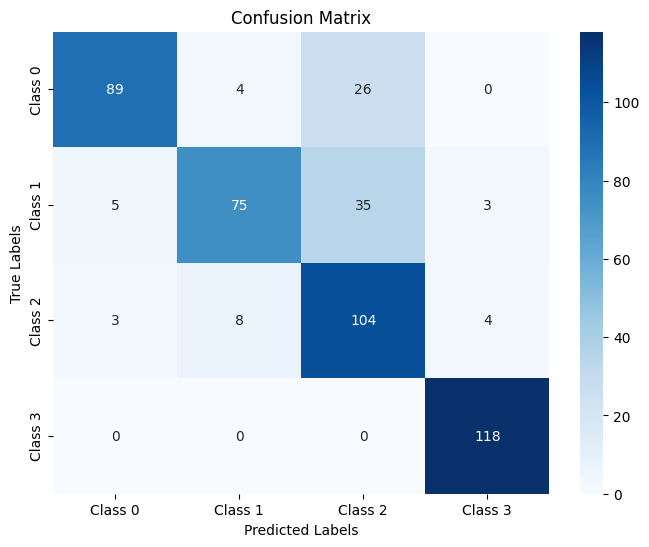

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
report2 =classification_report(y_test,y_pred)
print(report2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


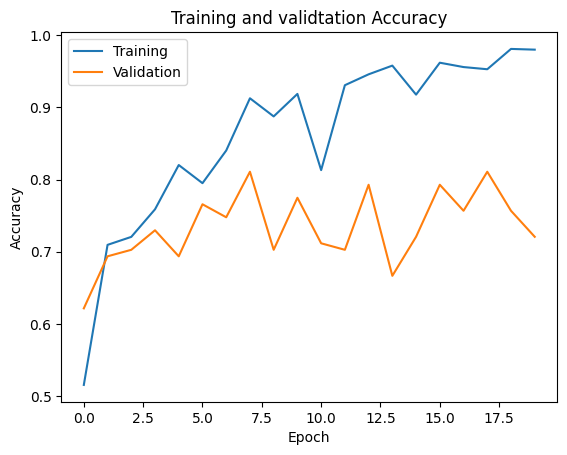

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validtation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])

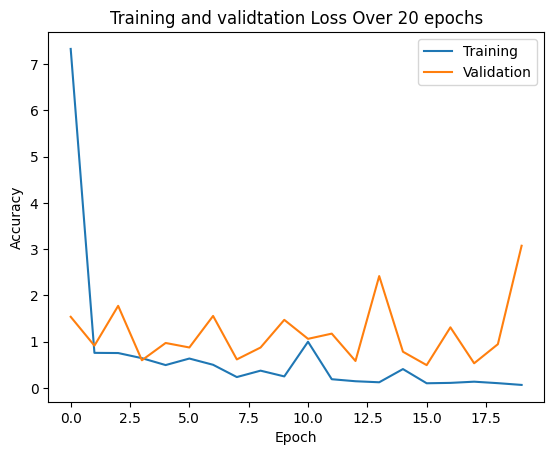

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validtation Loss Over 20 epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


In [ ]:
pip install seaborn

In [ ]:

def grayscale_to_rgb(images, channel_axis=-1):
    #images= K.expand_dims(images, axis=channel_axis)
    tiling = [1] * 4    # 4 dimensions: B, H, W, C
    tiling[channel_axis] *= 3
    images= K.tile(images, tiling)
    return images

rgb_train = grayscale_to_rgb(features_train)
rgb_test = grayscale_to_rgb(features_test)
rgb_test.shape

TensorShape([474, 512, 512, 3])

In [ ]:
in_shape = Input(shape = (512,512,3))
# load model

res_model = ResNet50(include_top=False,
                 input_tensor=in_shape,
                 weights = "imagenet")

for layer in res_model.layers[:143]:
  layer.trainable = False
# summarize the model
res_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:

from keras import models, layers
renet50_model = models.Sequential()
renet50_model.add(res_model)
renet50_model.add(layers.Flatten())
renet50_model.add(layers.Dense(4, activation='softmax'))
renet50_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_renet50 = renet50_model.fit(rgb_train, target_train, batch_size=32,epochs = 5,validation_data=(rgb_test,target_test))

Epoch 1/5
35/35 [==============================] - 57s 929ms/step - loss: 4.1668 - accuracy: 0.5922 - val_loss: 26034.6348 - val_accuracy: 0.2890
Epoch 2/5
35/35 [==============================] - 24s 702ms/step - loss: 3.1473 - accuracy: 0.7586 - val_loss: 14377.0391 - val_accuracy: 0.2616
Epoch 3/5
35/35 [==============================] - 25s 711ms/step - loss: 1.8923 - accuracy: 0.7993 - val_loss: 3489.9634 - val_accuracy: 0.4494
Epoch 4/5
35/35 [==============================] - 25s 727ms/step - loss: 2.7038 - accuracy: 0.8662 - val_loss: 1661.0585 - val_accuracy: 0.5612
Epoch 5/5
35/35 [==============================] - 26s 743ms/step - loss: 1.9599 - accuracy: 0.9051 - val_loss: 262.5435 - val_accuracy: 0.6013


15/15 [==============================] - 7s 449ms/step
              precision    recall  f1-score   support

           0       0.56      0.79      0.66       119
           1       0.74      0.51      0.60       118
           2       0.33      0.19      0.24       119
           3       0.69      0.92      0.79       118

    accuracy                           0.60       474
   macro avg       0.58      0.60      0.57       474
weighted avg       0.58      0.60      0.57       474



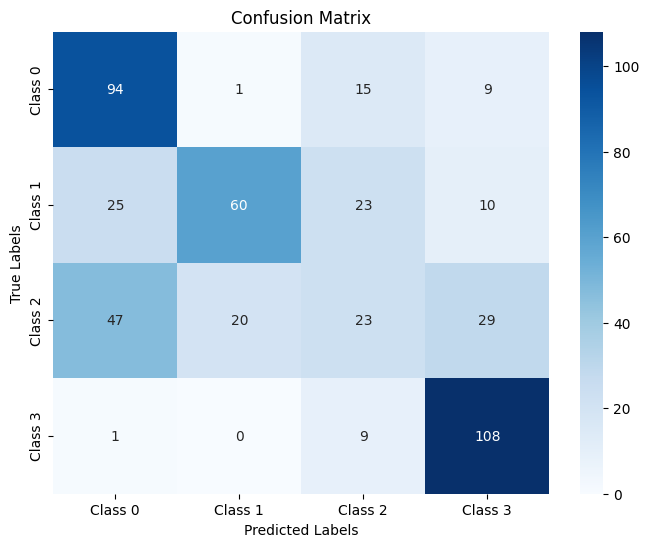

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred_prob = renet50_model.predict(rgb_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(target_test, axis=1)

report3 =classification_report(y_test,y_pred)
print(report3)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss, accuracy = renet50_model.evaluate(rgb_test, target_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 7s 439ms/step - loss: 262.5435 - accuracy: 0.6013
Test Loss: 262.54345703125
Test Accuracy: 0.6012658476829529


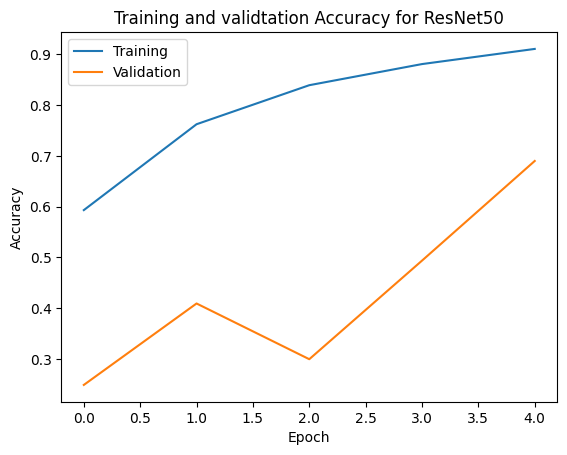

In [ ]:

plt.plot(history_renet50.history['accuracy'])
plt.plot(history_renet50.history['val_accuracy'])
plt.title('Training and validtation Accuracy for ResNet50')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


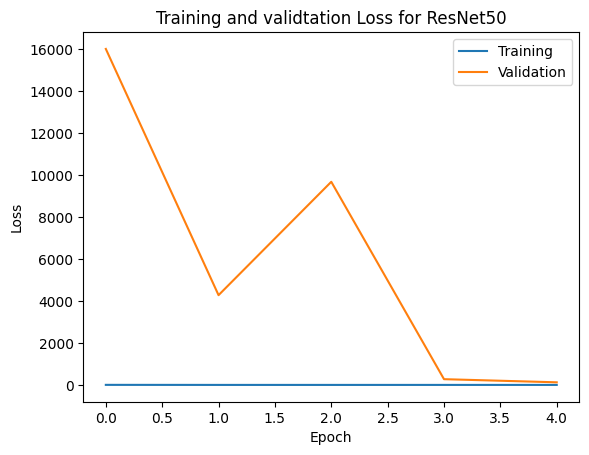

In [ ]:
plt.plot(history_renet50.history['loss'])
plt.plot(history_renet50.history['val_loss'])
plt.title('Training and validtation Loss for ResNet50')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


In [ ]:
features_train.shape

(1106, 512, 512, 1)

In [ ]:
def resize_image(img):
  img = cv2.resize(img,(224,224))
  return img

In [ ]:
fetures_resize = np.zeros((1106,224,224))
for i in range(1106):
  fetures_resize[i]= resize_image(features_train[i,:,:,0])

In [ ]:
fetures_resize.shape

(1106, 224, 224)

In [ ]:
  from tensorflow.keras.applications.vgg16 import VGG16
  from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Lambda
  from tensorflow.keras.models import Model
  from tensorflow.keras.models import Model
  from tensorflow.keras.optimizers import Adam



  num_classes = 4
  input_shape = (224, 224, 1)

  def repeat_channels(x):
      return K.repeat_elements(x, 3, axis=-1)

  input_tensor = Input(shape=input_shape)
  rgb_tensor = Lambda(repeat_channels)(input_tensor)
  base_model = VGG16(weights='imagenet', include_top=False, input_tensor=rgb_tensor)
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  predictions = Dense(num_classes, activation='softmax')(x)
  VGG16model = Model(inputs=base_model.input, outputs=predictions)
  VGG16model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model on the training data
  history = VGG16model.fit(fetures_resize, target_train, batch_size=32, epochs=10, validation_split=.2 )




58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/10
28/28 [==============================] - 39s 814ms/step - loss: 73.1162 - accuracy: 0.3156 - val_loss: 1.2079 - val_accuracy: 0.3964
Epoch 2/10
28/28 [==============================] - 11s 390ms/step - loss: 1.1839 - accuracy: 0.4265 - val_loss: 1.1112 - val_accuracy: 0.5270
Epoch 3/10
28/28 [==============================] - 11s 392ms/step - loss: 1.0976 - accuracy: 0.4977 - val_loss: 1.0155 - val_accuracy: 0.4955
Epoch 4/10
28/28 [==============================] - 11s 396ms/step - loss: 1.1092 - accuracy: 0.4943 - val_loss: 1.0056 - val_accuracy: 0.5270
Epoch 5/10
28/28 [==============================] - 11s 400ms/step - loss: 1.0134 - accuracy: 0.5204 - val_loss: 0.9590 - val_accuracy: 0.4910
Epoch 6/10
28/28 [==============================] - 11s 403ms/step - loss: 1.9346 - accuracy: 0.4140 - val_loss: 1.1478 - val_accuracy: 0.4910
Epoch 7/10
28/28 [==============================] - 11s 405ms/step - loss: 1.0604 - accuracy: 0.4943 - val_loss: 0.9851 - val_accuracy: 0.495

In [ ]:
 features_test.shape

(474, 512, 512, 1)

In [ ]:
def resize_imagetest(img):
  img = cv2.resize(img,(224,224))
  #imgnew = np.zeros((224,224,3))
  #imgnew[:,:,0]= img
  #imgnew[:,:,1]= img
  #imgnew[:,:,2]= img
  return img
fetures_resizetest = np.zeros((474,224,224))
for i in range(474):
  fetures_resizetest[i]= resize_imagetest(features_test[i,:,:,0])



In [ ]:
# Evaluating the model on the testing data
loss, accuracy = VGG16model.evaluate(fetures_resizetest, target_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 5s 360ms/step - loss: 0.9770 - accuracy: 0.5253
Test Loss: 0.9769902229309082
Test Accuracy: 0.5253164768218994


15/15 [==============================] - 2s 112ms/step
              precision    recall  f1-score   support

           0       0.38      0.29      0.33       119
           1       0.39      0.64      0.48       118
           2       0.51      0.19      0.28       119
           3       0.80      0.99      0.88       118

    accuracy                           0.53       474
   macro avg       0.52      0.53      0.49       474
weighted avg       0.52      0.53      0.49       474



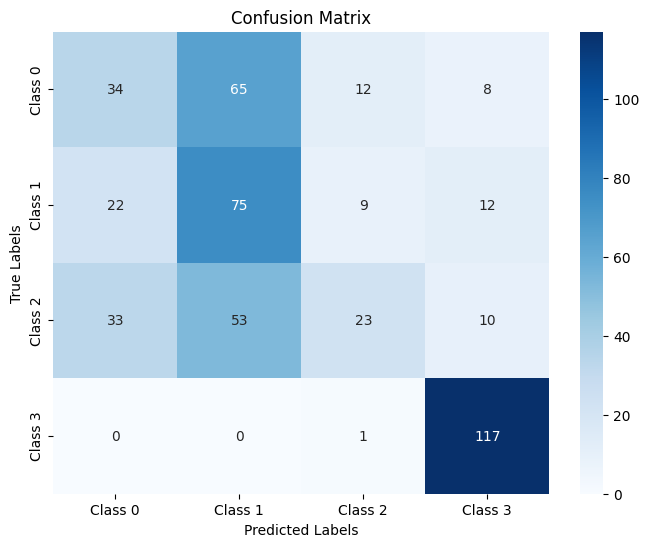

In [ ]:

y_pred_prob = VGG16model.predict(fetures_resizetest)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(target_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
report2 =classification_report(y_test,y_pred)
print(report2)

# Plot the confusion matrix as a heatmap
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
fetures

(1106, 512, 512, 1)

In [ ]:
features_test.shape

(474, 512, 512, 1)

In [ ]:
#inception v3

In [ ]:
def resize_images(img):
    img = cv2.resize(img, (224, 224))
    return img

fetures_resizes = np.zeros((1106, 224, 224))
for i in range(1106):
    fetures_resizes[i] = resize_images(features_train[i, :, :, 0])


In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
import numpy as np
import cv2
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard

num_classes = 4

def resize_imageinp(img):
    # Resize the image using OpenCV resize function
    return cv2.resize(img, (299, 299))

# Resize the 'features_train' array to match the input shape of InceptionV3
resized_features = np.zeros((1106, 299, 299,3))
for i in range(1106):
    resized_features[i, :, :, 0] = resize_imageinp(features_train[i, :, :, 0])

resized_features_test = np.zeros((len(features_test), 299, 299,3))
for i in range(len(features_test)):
    resized_features_test[i, :, :, 0] = resize_imageinp(features_test[i, :, :, 0])

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
output_layer = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model summary
model.summary()

tensorboard = TensorBoard(log_dir='./logs', write_graph=True, write_images=True)

# Fit the model to the data



87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
model.fit(resized_features, target_train,
          batch_size=32,
          epochs=20,
          validation_split=.1,
          callbacks=[tensorboard])

Epoch 1/20
32/32 [==============================] - 44s 619ms/step - loss: 0.6904 - accuracy: 0.7065 - val_loss: 1.5183 - val_accuracy: 0.5135
Epoch 2/20
32/32 [==============================] - 13s 417ms/step - loss: 0.2547 - accuracy: 0.9116 - val_loss: 0.9710 - val_accuracy: 0.6396
Epoch 3/20
32/32 [==============================] - 14s 423ms/step - loss: 0.1636 - accuracy: 0.9447 - val_loss: 0.5812 - val_accuracy: 0.7748
Epoch 4/20
32/32 [==============================] - 14s 430ms/step - loss: 0.1123 - accuracy: 0.9628 - val_loss: 0.4854 - val_accuracy: 0.8288
Epoch 5/20
32/32 [==============================] - 14s 435ms/step - loss: 0.0742 - accuracy: 0.9779 - val_loss: 0.8540 - val_accuracy: 0.8108
Epoch 6/20
32/32 [==============================] - 14s 441ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.4285 - val_accuracy: 0.8649
Epoch 7/20
32/32 [==============================] - 14s 441ms/step - loss: 0.0924 - accuracy: 0.9719 - val_loss: 0.3190 - val_accuracy: 0.8919

15/15 [==============================] - 2s 127ms/step
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       119
           1       0.78      0.70      0.74       118
           2       0.91      0.72      0.81       119
           3       0.94      0.95      0.95       118

    accuracy                           0.84       474
   macro avg       0.85      0.84      0.84       474
weighted avg       0.85      0.84      0.84       474



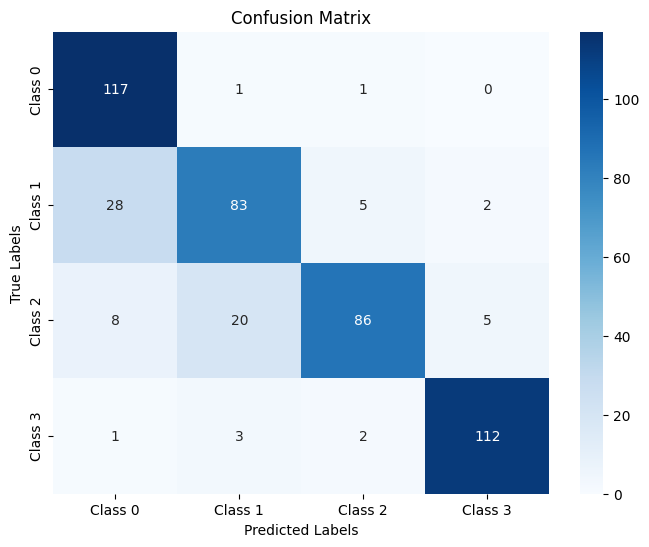

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred_prob = model.predict(resized_features_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(target_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
report =classification_report(y_test,y_pred)
print(report)
# Plot the confusion matrix as a heatmap
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(resized_features_test, target_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 4s 293ms/step - loss: 0.7337 - accuracy: 0.8734
Test Loss: 0.7336569428443909
Test Accuracy: 0.8734177350997925


In [ ]:
resize_imageinp(features_train[0]).shape

(299, 299)

In [ ]:
target_train

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
def resize_images_mob(img):
    img = cv2.resize(img, (224, 224))
    return img

fetures_resized_mob = np.zeros((1106, 224, 224,3))
for i in range(1106):
    fetures_resized_mob[i,:,:,0] = resize_images_mob(features_train[i, :, :, 0])
    fetures_resized_mob[i,:,:,1] = resize_images_mob(features_train[i, :, :, 0])
    fetures_resized_mob[i,:,:,2] = resize_images_mob(features_train[i, :, :, 0])



fetures_resized_mobtest= np.zeros((len(features_test), 224, 224,3))
for i in range(len(features_test)):
    fetures_resized_mobtest[i,:,:,0] = resize_images_mob(features_test[i, :, :, 0])
    fetures_resized_mobtest[i,:,:,1] = resize_images_mob(features_test[i, :, :, 0])
    fetures_resized_mobtest[i,:,:,2] = resize_images_mob(features_test[i, :, :, 0])

In [ ]:

from keras.models import Sequential
from keras.layers import Activation, GlobalAveragePooling2D,Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import mobilenet_v2
from keras.layers import Input
import numpy as np
from keras import Model

In [ ]:

tensorboard = TensorBoard(log_dir='./MobileNet_v2', histogram_freq=0,
                          write_graph=True, write_images=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)




In [ ]:

image_size = 224
IMG_SHAPE = (image_size, image_size, 3)
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

In [ ]:

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:

CLASSES = 4
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'],
              )

In [ ]:
history = model.fit(fetures_resized_mob, target_train,
                    batch_size=32,
                    epochs=40,

                    validation_split=(.1),
                    callbacks=[tensorboard])


Epoch 1/40
32/32 [==============================] - 6s 105ms/step - loss: 1.3134 - accuracy: 0.4543 - val_loss: 0.8636 - val_accuracy: 0.6667
Epoch 2/40
32/32 [==============================] - 1s 46ms/step - loss: 0.9973 - accuracy: 0.5839 - val_loss: 0.8838 - val_accuracy: 0.5856
Epoch 3/40
32/32 [==============================] - 1s 46ms/step - loss: 0.8774 - accuracy: 0.6121 - val_loss: 0.7292 - val_accuracy: 0.6577
Epoch 4/40
32/32 [==============================] - 1s 46ms/step - loss: 0.8126 - accuracy: 0.6583 - val_loss: 0.6966 - val_accuracy: 0.6847
Epoch 5/40
32/32 [==============================] - 1s 46ms/step - loss: 0.7469 - accuracy: 0.6704 - val_loss: 0.6702 - val_accuracy: 0.7027
Epoch 6/40
32/32 [==============================] - 1s 46ms/step - loss: 0.7080 - accuracy: 0.7045 - val_loss: 0.6363 - val_accuracy: 0.7477
Epoch 7/40
32/32 [==============================] - 1s 46ms/step - loss: 0.6869 - accuracy: 0.7186 - val_loss: 0.6263 - val_accuracy: 0.7477
Epoch 8/40
3

15/15 [==============================] - 1s 80ms/step
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       119
           1       0.81      0.74      0.77       118
           2       0.78      0.77      0.78       119
           3       0.94      1.00      0.97       118

    accuracy                           0.84       474
   macro avg       0.84      0.84      0.84       474
weighted avg       0.84      0.84      0.84       474



Text(70.72222222222221, 0.5, 'True Labels')

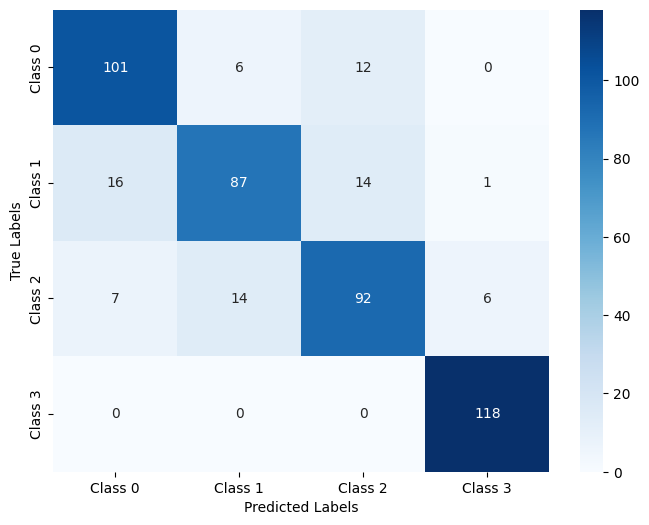

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred_prob = model.predict(fetures_resized_mobtest)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(target_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
report =classification_report(y_test,y_pred)
print(report)
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

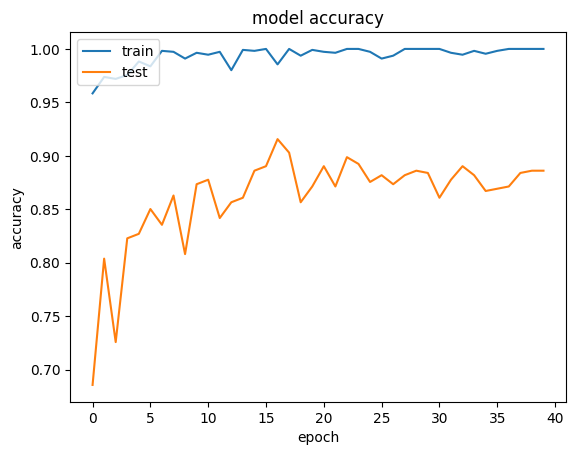

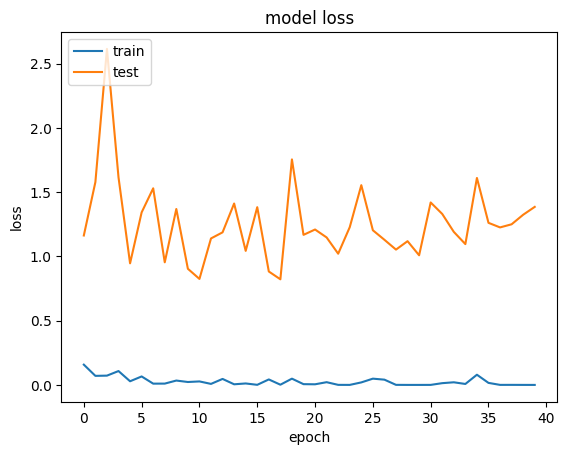

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(features_test, target_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


15/15 [==============================] - 0s 21ms/step - loss: 1.3859 - accuracy: 0.8861
Test loss: 1.385862946510315
Test accuracy: 0.8860759735107422
